# Unsupervised Learning

In today's lecture:
 - Introduction to dimensionality reduction via PCA
 - Explore classifications with reduced data 
 - Clustering
 - Anomaly detection

## Dimensionality Reduction

High-dimensional data, where datasets have a large number of attributes or features, presents challenges in visualization, computation, and sometimes, interpretation. This is where Principal Component Analysis (PCA), one of the most popular dimensionality reduction techniques, comes into play.

PCA is a statistical method that transforms a high-dimensional dataset into a lower-dimensional space, making it easier to visualize and often speeding up other data analysis tasks. But PCA doesn't merely reduce the data's dimensionality: it aims to capture the most significant structures in the data, preserving as much variability as possible. This is achieved by identifying the "directions" (or principal components) in which the data varies the most and projecting the data onto these directions.

The principal components themselves are linear combinations of the original features, orthogonal to each other, ensuring no redundant information. The first principal component captures the highest variance in the data, the second principal component (which is orthogonal to the first) captures the second most, and so on. By representing data in terms of these components, PCA provides a way to express data in a reduced number of dimensions that retains the data's essential structures.

To illustrate, imagine a cloud of data points in three-dimensional space that lies mostly on a flat surface. While the data is three-dimensional, its intrinsic structure can be captured using just two dimensions: the surface. PCA identifies this surface and enables us to represent each data point by its coordinates on the surface rather than in the full three-dimensional space.

### How do we compute PCA?

Standardize the data

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target
y_std = y

# Standardize the data
X_std = StandardScaler().fit_transform(X)

Calculate the covariance matrix

In [2]:
covariance_matrix = np.cov(X_std.T)

Compute Eigenvalues and Eigenvectors

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

Sort by descending eigenvalues. This will help in deciding which eigenvector(s) can be dropped without losing significant information.

In [4]:
# Create pairs (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Sort the pairs based on the eigenvalues
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [5]:
eig_pairs

[(2.938085050199995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624864,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449475,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462696,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Choose the top k eigenvectors. For this example, we'll reduce to 2 dimensions:

In [6]:
num_components = 2
matrix_w = np.hstack([eig_pairs[i][1].reshape(X_std.shape[1], 1) for i in range(num_components)])

In [7]:
matrix_w

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

Transform the original data

In [8]:
X_pca = X_std.dot(matrix_w)

In [9]:
X_std.shape

(150, 4)

In [10]:
X_pca.shape

(150, 2)

Let's plot the result for visual inspections

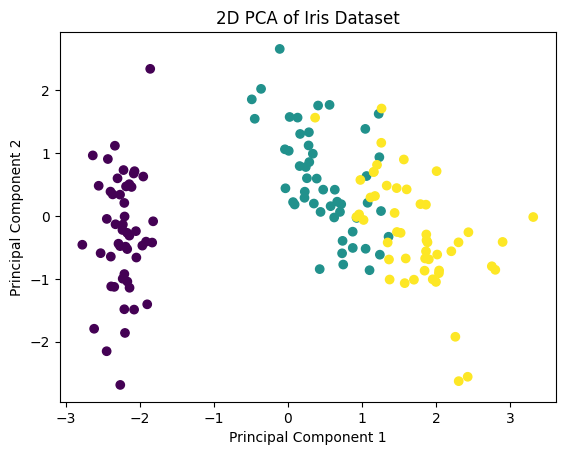

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Iris Dataset')
plt.show()

Examine variance explained

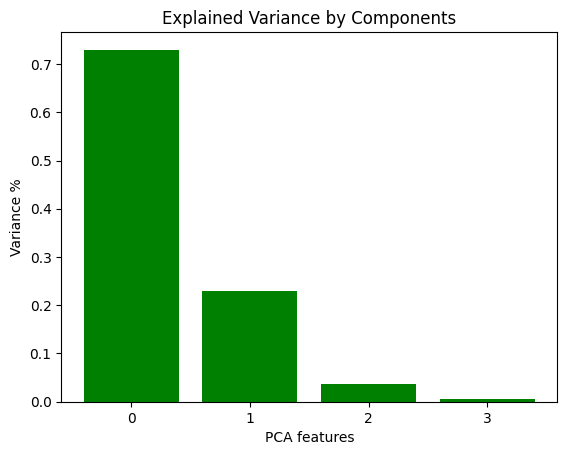

In [14]:
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA().fit(X_std)

# Plotting the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.title('Explained Variance by Components')
plt.show()

### How can we intuitively imagine what is PCA doing?

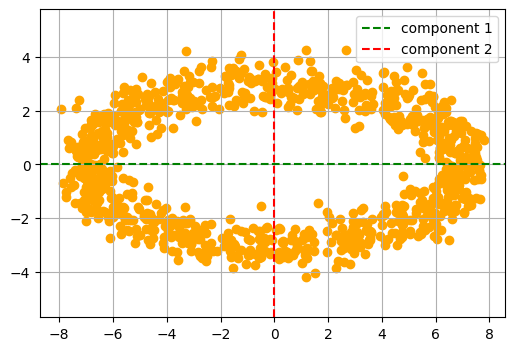

In [23]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 1000)
a = 7  # Semi-major axis length
b = 3  # Semi-minor axis length

x = a * np.cos(theta)
y = b * np.sin(theta)
x += np.random.normal(0, 0.5, x.shape)
y += np.random.normal(0, 0.5, y.shape)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='orange', marker='o')
plt.axhline(y=0, color='green', linestyle='--', label="component 1")
plt.axvline(x=0, color='red', linestyle='--', label="component 2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

0) Imagine a 2d scatter  of a set of points, in rough elliptic shape 

1) Find the center of the scatter

2) Draw the line of maximum variance that goes through the center (principal component)

3) Draw a line that is perpendicular to the first still through the center (second component)

4) Project the points on the first line, obtain a 2D->1D dimensionality reduction.  

### Use cases of pca

- Visualization: High-dimensional data can be projected into 2D or 3D space for visualization, allowing for easier identification of patterns or clusters.
 - Noise Reduction: By considering only the top principal components (those capturing the highest variance), one can filter out noise which typically resides in the lower-variance components.
 - Data Compression: Storing data in terms of its principal components rather than its original features can lead to significant reductions in storage requirements.
 - Speeding Up Machine Learning Algorithms: Algorithms can train faster on lower-dimensional data.

Visualization of PCA with two components for "digits"

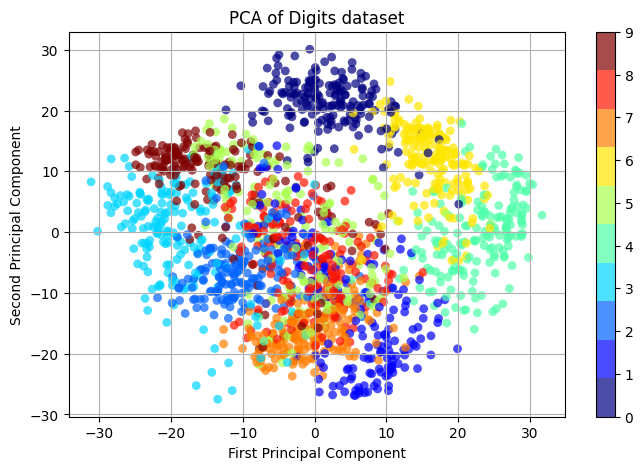

In [26]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Applying PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the results
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.7,
            cmap=plt.get_cmap('jet', 10), s=40)
plt.colorbar(scatter)
plt.title('PCA of Digits dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

Let's try iris classification with and without PCA, to see how dimensionality reduction affects performance

In [32]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.4, random_state=42)

Train classifiers on the original dataset

In [36]:
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
rf = RandomForestClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

lr_acc_original = accuracy_score(y_test, lr_pred)
rf_acc_original = accuracy_score(y_test, rf_pred)

print(f"Logistic Regression Accuracy (Original): {lr_acc_original:.4f}")
print(f"Random Forest Accuracy (Original): {rf_acc_original:.4f}")


Logistic Regression Accuracy (Original): 0.9833
Random Forest Accuracy (Original): 0.9833


Train classifiers on the reduced dataset

In [37]:
# Apply PCA and reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr.fit(X_train_pca, y_train)
rf.fit(X_train_pca, y_train)

lr_pred_pca = lr.predict(X_test_pca)
rf_pred_pca = rf.predict(X_test_pca)

lr_acc_pca = accuracy_score(y_test, lr_pred_pca)
rf_acc_pca = accuracy_score(y_test, rf_pred_pca)

print(f"\nLogistic Regression Accuracy (PCA): {lr_acc_pca:.4f}")
print(f"Random Forest Accuracy (PCA): {rf_acc_pca:.4f}")


Logistic Regression Accuracy (PCA): 0.9333
Random Forest Accuracy (PCA): 0.9500


## Clustering
At its core, clustering it's about grouping similar items together based on certain features or characteristics

Clustering aims to divide a dataset into groups, or "clusters", where items in the same group are more similar to each other than they are to items in other groups. It's "unsupervised" because, unlike classification, you're not provided with labeled examples as a guide; the algorithm tries to learn the groupings from the data itself.

A typical example of a clustering dataset could be:

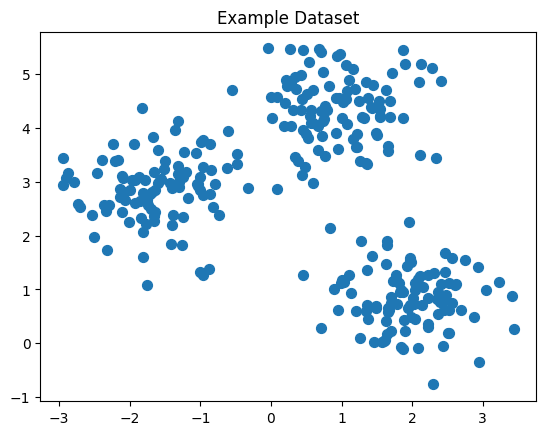

In [52]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN

# Create a sample dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Plot the sample dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Example Dataset")
plt.show()

We can think of clustering as a classification task where there are no class labels!

### K-means clustering

K-means is a centroid-based clustering algorithm that aims to partition a dataset into K distinct, non-overlapping subsets (or clusters). The number K represents the number of centroids you want in your dataset, where a centroid is the center of a cluster.

Let's explore the k-means algorithm:

1) Initialization: Randomly initialize K centroids.

2) Assignment: Assign each data point to the nearest centroid. This forms K clusters.

3) Update: Calculate the mean of all the points for each cluster, then move the centroid to that mean.

4) Repeat: Repeat the assignment and update steps until the centroids no longer change significantly.


Let's apply K-means on the blobs from above

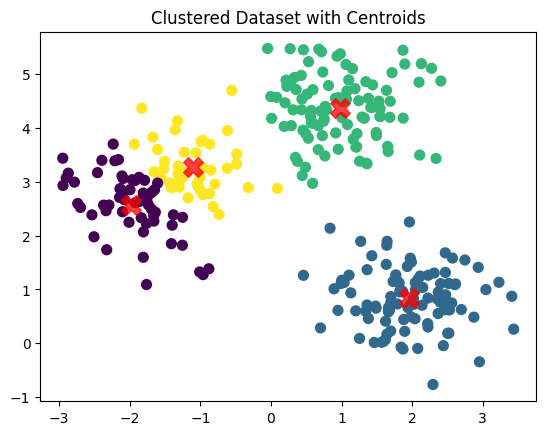

In [43]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered dataset
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clustered Dataset with Centroids")
plt.show()

how do we choose k? 

We can use the so called "elbow method", by plotting the sum of squared distances of samples to their closest cluster center for each number of clusters. The number of cluster with the maximum change in slope is the elbow.

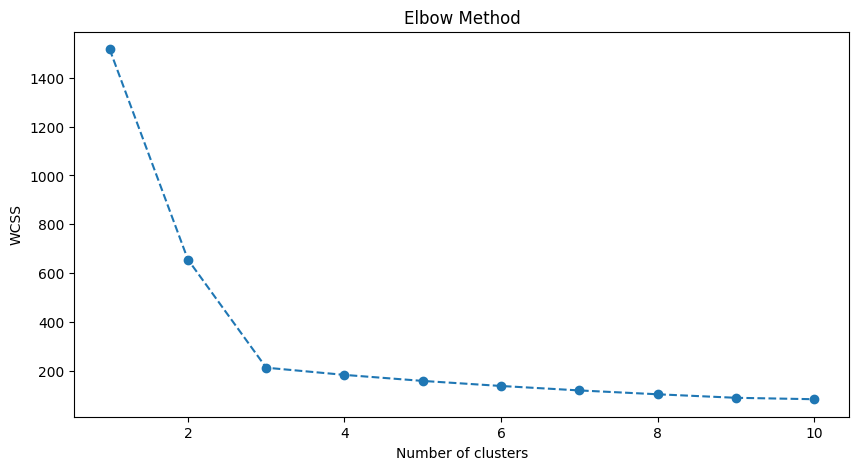

In [44]:
# Use the Elbow method to find a good number of clusters using WCSS (Within-Cluster-Sum-of-Squares)
wcss = []

# Let's check for up to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # Inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Initialization Matters: K-means is sensitive to the initialization of centroids. A bad initialization may lead to a suboptimal clustering. Scikit-learn by default uses the 'k-means++' initialization which generally produces better results than random initialization.

Local Minima: The K-means algorithm can converge to a local minimum, which means sometimes you might get slightly different clusters depending on the initial placement of centroids. Running the algorithm multiple times can give more consistent results.

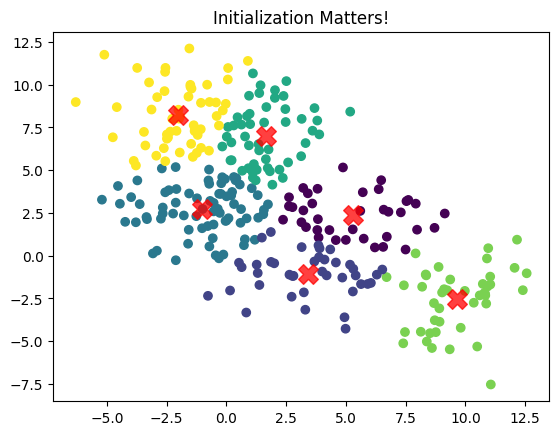

In [45]:
# Create a sample dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=7, cluster_std=1.90, random_state=0)

# Apply K-means clustering
kmeans = KMeans(n_clusters=6,init='random')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered dataset
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Initialization Matters!")
plt.show()

Distance Metric: K-means uses the Euclidean distance to assign data points to clusters. This makes the algorithm sensitive to the scale of the data. It's often recommended to normalize or standardize your data before clustering.

Cluster Shape: K-means assumes that clusters are spherical and equally sized, which might not always be the case in real-world datasets.

K-means performs poorly on datasets with non-spherical shapes

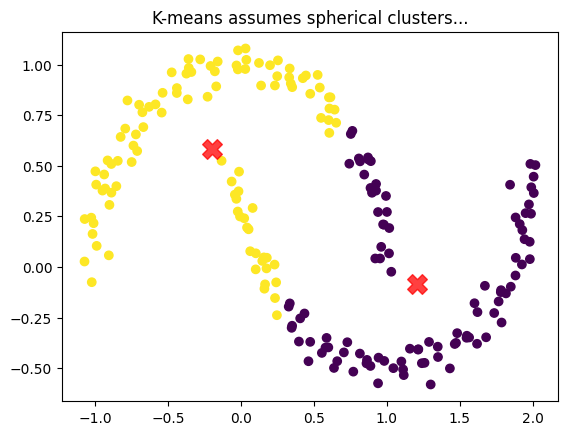

In [49]:
X, y = make_moons(200, noise=0.05, random_state=0)
# Apply K-means clustering
kmeans = KMeans(n_clusters=2,init='random')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered dataset
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means assumes spherical clusters...")
plt.show()

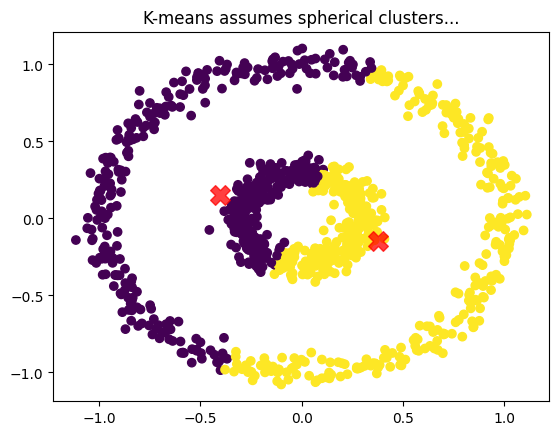

In [50]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05)
# Apply K-means clustering
kmeans = KMeans(n_clusters=2,init='random')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered dataset
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means assumes spherical clusters...")
plt.show()

K-means struggle with non-convex clusters, how can we approach this kind of problems? 

### DB-Scan clustering
DBSCAN is fundamentally different from K-means. Instead of forming clusters based on distances between points, DBSCAN looks at the density of points to create clusters. This distinction allows DBSCAN to find arbitrarily shaped clusters, making it especially powerful for datasets where clusters aren't necessarily spherical.

Let's take a look at DB-Scan algorithm 

1) Randomly select a point not yet visited.

2) If there are at least MinPts points within a radius of ϵ from that point, create a new cluster starting with that point. Expand this cluster by adding all directly reachable points (both core and border points).

3) If a point is found that is not a core point and not close to any core point, label it as noise.

4) Repeat the process until all points are either assigned to a cluster or labeled as noise.

where a core point is a point that has at least a minimum number of other points (MinPts) within its ϵ radius, and a border point is piont that has fewer than MinPts within its ϵ radius, but lies within the ϵ radius of a core point.

Advantages:

- Unlike K-means, you don't need to specify the number of clusters in advance.
- Arbitrary Cluster Shapes: Can detect clusters of various shapes, not just spheres.
- Noise Identification: Can identify and handle noise and outliers. (it can be used for anomaly detection)

Disadvantages:

- Complexity: In the worst case, the complexity can be higher than linear with respect to the number of data points.
- Parameters: Choosing ϵ and MinPts can sometimes be non-intuitive, especially without domain knowledge.
- Variability: Different parameter choices can lead to varied clustering results.

We now take a look at some examples

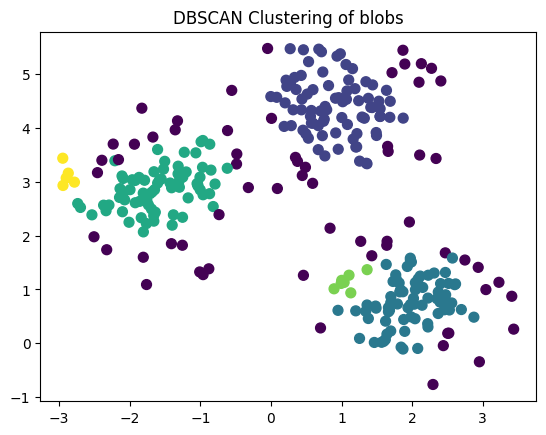

In [53]:
# Create a sample dataset with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title("DBSCAN Clustering of blobs")
plt.show()

Hyperparameters tuning is crucial!

Testing on non-convex clusters

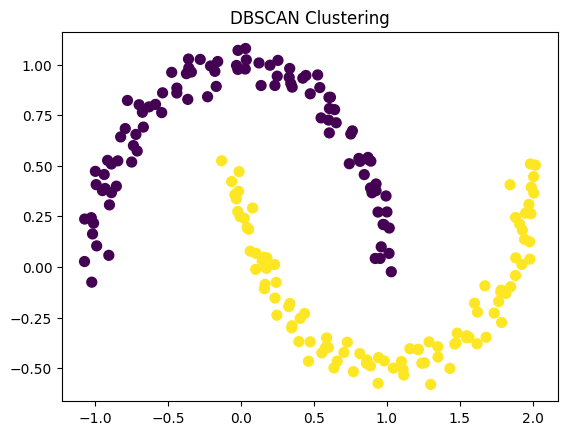

In [54]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate a "two moons" dataset
X, _ = make_moons(200, noise=0.05, random_state=0)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

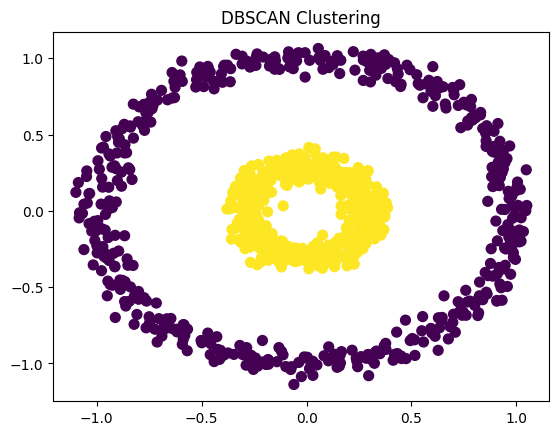

In [55]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05)
# Apply K-means clustering
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

We proceed by examining a real world example, once again the iris dataset

In [59]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = StandardScaler().fit_transform(X)

In [60]:
# Define KMeans and DBSCAN algorithms
kmeans = KMeans(n_clusters=3)
db = DBSCAN(eps=1, min_samples=15)

# Cluster data using all features
kmeans_labels = kmeans.fit_predict(X)
db_labels = db.fit_predict(X)

We now visualize the result, using only sepal length and sepal width

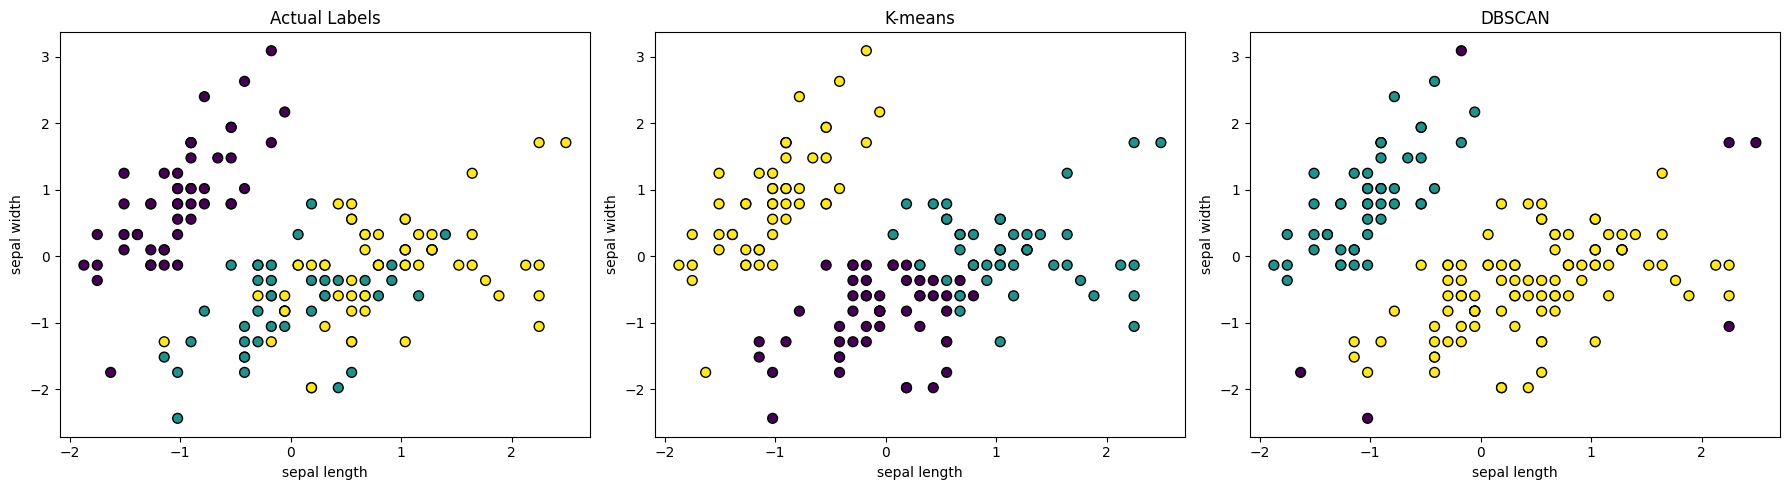

In [61]:
def plot_clustering(X, labels, title, ax):
    # For visualization, we onlyuse the first two features
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, edgecolors='k')
    ax.set_xlabel('sepal length')
    ax.set_ylabel('sepal width')
    ax.set_title(title)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
plot_clustering(X, y, "Actual Labels", ax1)
plot_clustering(X, kmeans_labels, "K-means", ax2)
plot_clustering(X, db_labels, "DBSCAN", ax3)
plt.tight_layout()
plt.show()

We see that K-means outperform DB-Scan in this circumstance, possibly because of the hard coding of being 3 clusters. 

## Anomaly Detection
The last subject we approach today is anomaly detection as an unsupervised approach. We may find ourselves in the situation where a dataset contains outlier values, which may be produced by a mistake in the data collection process. 

We may therefore want to clean the dataset of these values that may impair our future machine learning processes.

In [140]:
# Create blobs
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.3, random_state=0)

# Add some random anomalies
np.random.seed(0)
anomalies = np.random.rand(20, 2) * [6, 6] + [-3, -3]
data_with_anomalies = np.vstack([data, anomalies])

# Standardize the data
scaler = StandardScaler()
data_with_anomalies = scaler.fit_transform(data_with_anomalies)
anomalies = scaler.transform(anomalies)

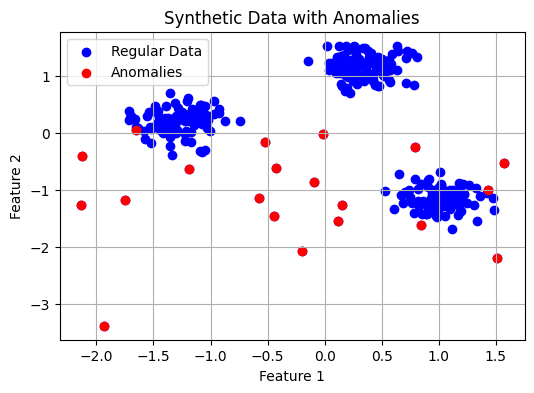

In [141]:
# Plotting the data
plt.figure(figsize=(6, 4))
plt.scatter(data_with_anomalies[:, 0], data_with_anomalies[:, 1], c='blue', label='Regular Data')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')
plt.title('Synthetic Data with Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

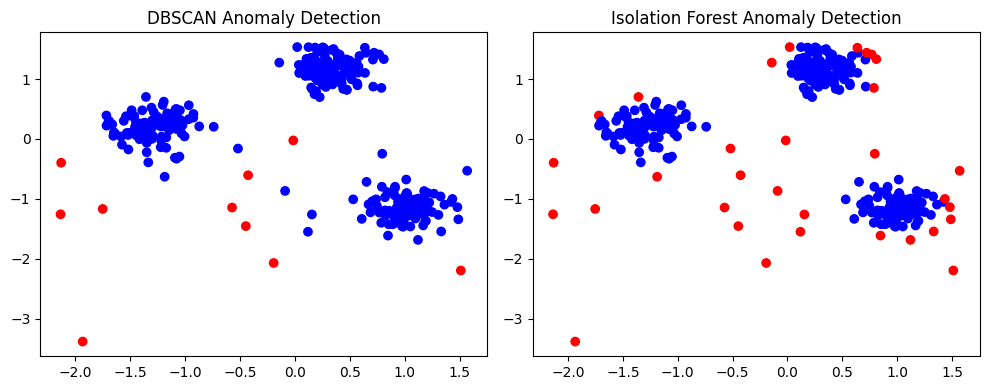

In [139]:
# DBSCAN Anomaly Detection
db = DBSCAN(eps=0.5, min_samples=5).fit(data_with_anomalies)
labels_db = db.labels_

# Isolation Forest Anomaly Detection
iso = IsolationForest(contamination=0.1).fit(data_with_anomalies)
labels_iso = iso.predict(data_with_anomalies)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# DBSCAN Results
ax[0].scatter(data_with_anomalies[:, 0], data_with_anomalies[:, 1], 
              c=['red' if label == -1 else 'blue' for label in labels_db])
ax[0].set_title('DBSCAN Anomaly Detection')

# Isolation Forest Results
ax[1].scatter(data_with_anomalies[:, 0], data_with_anomalies[:, 1], 
              c=['red' if label == -1 else 'blue' for label in labels_iso])
ax[1].set_title('Isolation Forest Anomaly Detection')

plt.tight_layout()
plt.show()


Can you guess how isolation forest work?

Should you perform anomaly detection cleaning of your dataset? 

True outliers can impair model perfomance, leading to poor generalization. Outliers also distort statistical measures, affecting predictions. Having less noise also helps in identifying true underlying patterns and avoid false assumption. (example: wow this day rained 200mm, it must be very unusual and important! but no is just a faulty sensor...)

But there are also reasons not to clean the dataset, not All Anomalies are Errors: Some anomalies are genuine and critical. There is also the risk of Over-Cleaning: overzealous cleaning can lead to information loss.

### Appendix 1 
A major comparison of clustering methods

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation

In [105]:
# Data generation, using two blobs and two moons
X1, _ = datasets.make_moons(n_samples=300, noise=0.02)
X2, _ = datasets.make_blobs(n_samples=300, centers=[[-0.5, 0.5], [1, -1]], cluster_std=0.1)
X = np.vstack([X1, X2])

In [113]:
# Define a vast set of clustering algorithms
algorithms = [
    ("K-means", KMeans(n_clusters=4)),
    ("DBSCAN", DBSCAN(eps=0.1)),
    ("Agglomerative (Ward's)", AgglomerativeClustering(n_clusters=4, linkage='ward')),
    ("Gaussian Mixture Model", GaussianMixture(n_components=4)),
    ("Affinity Propagation", AffinityPropagation(random_state=42)),
    ("Spectral Clustering", SpectralClustering(n_clusters=4)),
    ("Mean Shift", MeanShift(bandwidth=0.4)),
    ("OPTICS", OPTICS(min_samples=5))
]

Beware! tuning of these models is approximate!

/home/fmerizzi/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


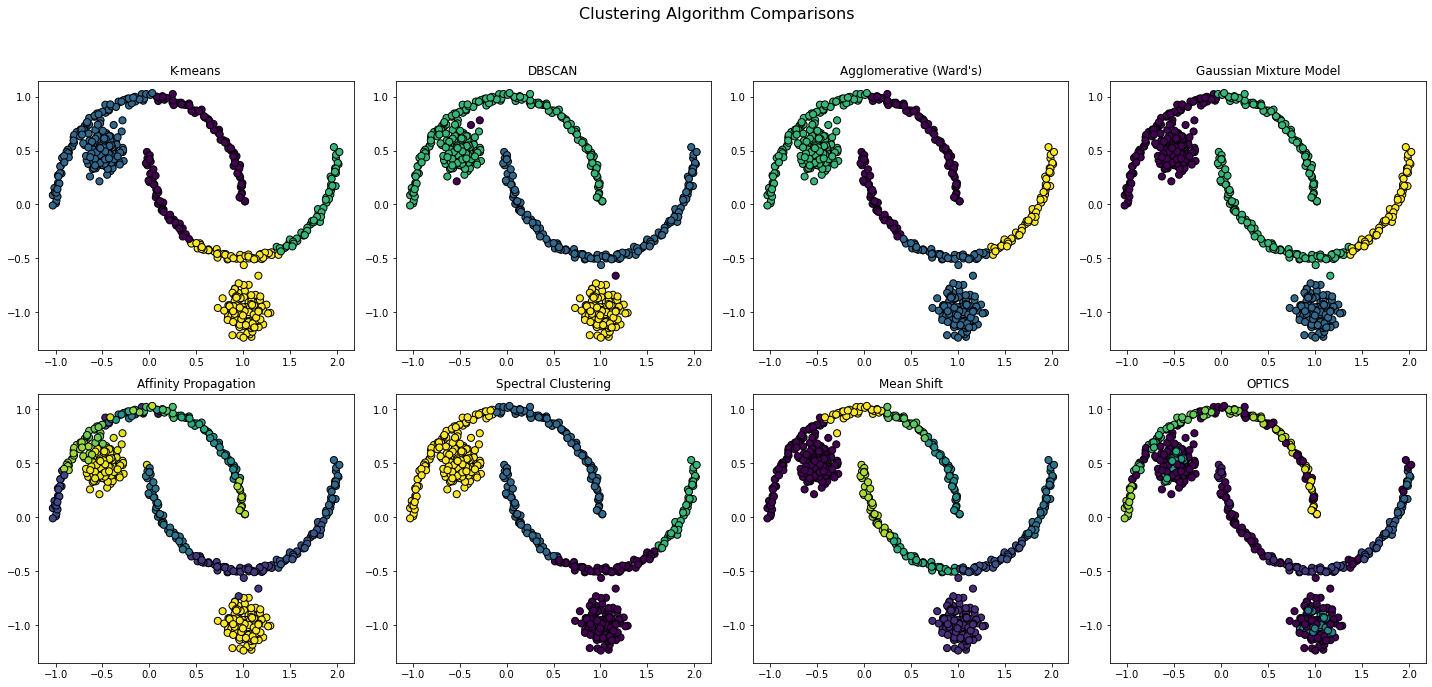

In [114]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle("Clustering Algorithm Comparisons", fontsize=16)

for ax, (name, algorithm) in zip(axes.ravel(), algorithms):
    # Special handling for GaussianMixture
    if name == "Gaussian Mixture Model":
        algorithm.fit(X)
        labels = algorithm.predict(X)
    else:
        labels = algorithm.fit_predict(X)

    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=50, edgecolors='k')
    ax.set_title(name)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the spacing
plt.show()

### Appendix 2 
The same task with a neural model, once again just as a black box! 

In [82]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from keras.layers import Input, Dense
from keras.models import Model

# Load and scale the Iris dataset
iris = datasets.load_iris()
X = iris.data
X = StandardScaler().fit_transform(X)


Define an all-dense autoencoder

In [83]:
# Define the autoencoder architecture
encoding_dim = 2  # Compressed representation size

input_data = Input(shape=(X.shape[1],))  # Input layer
encoded = Dense(10, activation='relu')(input_data)  # First encoding layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Compressed representation

decoded = Dense(10, activation='relu')(encoded)  # First decoding layer
decoded = Dense(X.shape[1], activation='sigmoid')(decoded)  # Reconstruction of input

autoencoder = Model(input_data, decoded)

Compile and train the model 

In [84]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X, X, epochs=500, batch_size=16, shuffle=True, verbose=0)

In [85]:
# Extract the encoder part to obtain compressed representations
encoder = Model(input_data, encoded)
X_compressed = encoder.predict(X)


5/5 [==============================] - 0s 822us/step


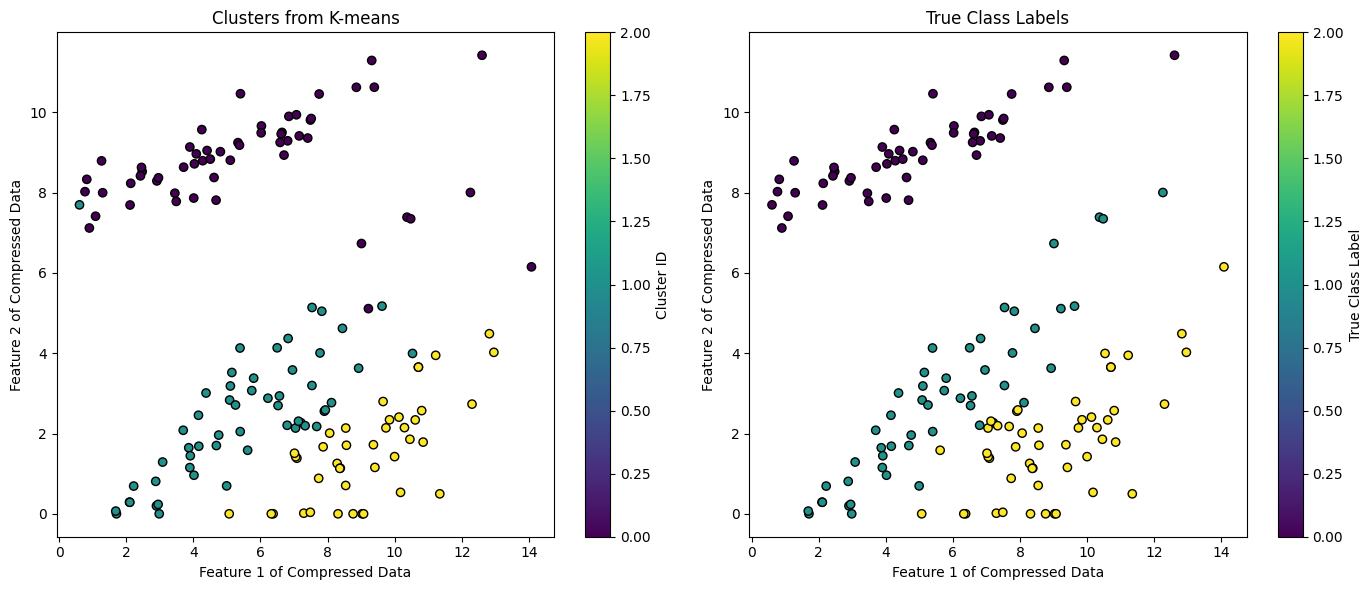

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot using clustering labels as color
sc1 = ax1.scatter(X_compressed[:, 0], X_compressed[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
ax1.set_title('Clusters from K-means')
ax1.set_xlabel('Feature 1 of Compressed Data')
ax1.set_ylabel('Feature 2 of Compressed Data')
fig.colorbar(sc1, ax=ax1).set_label('Cluster ID')

# Plot using true labels as color
sc2 = ax2.scatter(X_compressed[:, 0], X_compressed[:, 1], c=y_true, cmap='viridis', edgecolor='k')
ax2.set_title('True Class Labels')
ax2.set_xlabel('Feature 1 of Compressed Data')
ax2.set_ylabel('Feature 2 of Compressed Data')
fig.colorbar(sc2, ax=ax2).set_label('True Class Label')

plt.tight_layout()
plt.show()